# Mô tả bài toán:
----------------------

- Con người ta hay ở chỗ là "miệng nói 1 mà lòng nghĩ 2", thế mà không chỉ "nói" mà còn cả viết nữa, các nhà thơ, nhà văn đã viết lên những bài văn có tính ngụ ý cao, những lời hay nhưng nghĩa châm biếm, đả kích rất hay.
- Vì thế các tin tức hiện nay, của Donald Trump hay của bất kì celeb nổi tiếng nào cũng làm các con AI của Facebook hay Google đau đầu vì không biết họ có ý như là họ viết dòng twitter đó hay không ???
- Nên có các tập datasets đã được thu thập bởi Kaggle, hay bất kì ai từ 2 nguồn tin cậy cho thứ nhất: tin thật sự,không mỉa mai và hai: tin châm biến mà đến giờ tôi biết là https://www.huffpost.com/ - chuyên tin chính thống và https://www.theonion.com/ - chuyên tin lá cải,châm biếm.
- Và lý do không chọn Twitter làm nguồn cho tập dữ liệu: vì nó có cả 2 loại tin và ngay cả con người cũng khó phân biệt ra 2 loại tin này và ta lại mất thời gian đi gán nhãn dữ liệu. Nhưng cũng có thể test headline trên twitter sau khi đã (cho rằng) train xong model.

[Sarcasm_Detection_on_Facebook](https://www.researchgate.net/publication/327639471_Sarcasm_Detection_on_Facebook_A_Supervised_Learning_Approach)

- Đỏi ngược quá trình tí xíu: đây là các bước download, train ,đánh giá,finetune mô hình, còn bước crawl,thu nhập dữ liệu sẽ ở gần cuối để chỉ ra: không có dữ liệu crawl được nào được đưa vào mô hình được train.

In [ ]:
!wget "https://storage.googleapis.com/kaggle-data-sets/30764%2F533474%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592881274&Signature=GrZQXFVKopyK4MVIuh20xJ0lMzISDvCN3EHWv1AE0Qk53CTBk8LCdwfgQL1fnbh7DdO%2B10oKQWl%2FLlQq8kZ3mVQgrHY6DzUpWhUUiLg6nrLkQ%2Fd7QQmKf8u3Sd2zNGAf%2BknymMNeL7%2FXTXYYtQTWuMXw5BjTYdJe11TbefnyvyZBlzmUSb7MnQ9fLiQJEEXaz8LyRjKo8nm4dkYOzYwUFXu0MSFC6oB9lpb89i%2FtNWAMKcgszSzzoIDZgYCdHYE4apfr8fRsxNiZQZhcHKdHJmpkx17qQuue%2FhbqKdfSE4QC6dtH9SutB1JbdORGYUQ%2FHMTmcl%2FNV9lEhlPaH79PPQ%3D%3D" -O "headlines.zip"

--2020-06-23 14:50:51--  https://storage.googleapis.com/kaggle-data-sets/30764%2F533474%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592881274&Signature=GrZQXFVKopyK4MVIuh20xJ0lMzISDvCN3EHWv1AE0Qk53CTBk8LCdwfgQL1fnbh7DdO%2B10oKQWl%2FLlQq8kZ3mVQgrHY6DzUpWhUUiLg6nrLkQ%2Fd7QQmKf8u3Sd2zNGAf%2BknymMNeL7%2FXTXYYtQTWuMXw5BjTYdJe11TbefnyvyZBlzmUSb7MnQ9fLiQJEEXaz8LyRjKo8nm4dkYOzYwUFXu0MSFC6oB9lpb89i%2FtNWAMKcgszSzzoIDZgYCdHYE4apfr8fRsxNiZQZhcHKdHJmpkx17qQuue%2FhbqKdfSE4QC6dtH9SutB1JbdORGYUQ%2FHMTmcl%2FNV9lEhlPaH79PPQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 2607:f8b0:400c:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 400 Bad Request
2020-06-23 14:50:52 ERROR 400: Bad Request.



File rất nhẹ, không gì lo cho việc đường truyền hay nặng google cả, đâu phải máy của mình.

Ở đây mình dùng luôn unzip trên linux, không cần cài đặt gì cả!

In [ ]:
!unzip "/content/headlines.zip"

Archive:  /content/headlines.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/headlines.zip or
        /content/headlines.zip.zip, and cannot find /content/headlines.zip.ZIP, period.


Để đọc file json, và pandas có hỗ trợ việc đọc này.

In [ ]:
import pandas as pd

In [ ]:
data_first = pd.read_json("Sarcasm_Headlines_Dataset.json")

ValueError: ignored

In [ ]:
# Không cho vậy thì ta đọc theo dòng !!
data_first = pd.read_json("Sarcasm_Headlines_Dataset.json",lines=True)

ValueError: ignored

In [ ]:
data_first.head()

NameError: ignored

Tương tự:

In [ ]:
# Thêm mỗi _v2
data_second = pd.read_json("Sarcasm_Headlines_Dataset_v2.json",lines=True)

In [ ]:
data_second.head()

## Tìm hiểu dữ liệu:

Kiểm tra dữ liệu: có missing, skew hay bla bla gì không.

pandas cũng hỗ trợ nốt trong việc tìm missing.

In [ ]:
# hàm isna trả về False nếu ko là na:mất thông tin, True : nếu có mất thông tin
# Và False được xem là giá trị 0 còn True được xem là giá trị 1: nên ta tổng theo từng feature/cột
data_first.isna()

In [ ]:
data_first.isna().sum()

Tương tự trên data_second

In [ ]:
data_second.isna().sum()

pandas hỗ trợ lấy cả index bằng số lẫn nên cột.
- iloc : hỗ trợ lấy bằng số/index.
- loc : hỗ trợ lấy bằng tên cột.

In [ ]:
data_first.loc[:,"is_sarcastic"]

Hàm value count : đếm giá trị đặc biệt

In [ ]:
data_first.loc[:,"is_sarcastic"].value_counts()

In [ ]:
data_second.loc[:,"is_sarcastic"].value_counts()

seaborn là một thư viện hỗ trợ việc plot dữ liệu như matplotlib.

In [ ]:
import seaborn as sns
sns.set_style("dark")
sns.countplot(data_second.loc[:,"is_sarcastic"])

Dữ liệu hơi hơi lệch về "không phải châm biếm".

Trong đây ta không cần đường dẫn vì không ai trong đây rảnh mà mở lên đọc cả :))

In [ ]:
data_first.drop(columns= 'article_link' , inplace = True)
data_second.drop(columns= 'article_link', inplace = True)

Thư viện nltk : Natural Language Toolkit hỗ trợ cho ta việc xử lý ngôn ngữ tự nhiên

## Xử lý ngôn ngữ tự nhiên:

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string,unicodedata

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

Để sửa lỗi này: ta thực hiện y hệt những gì thư viện quăng lại lỗi!!!

In [ ]:
nltk.download('stopwords')

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
stop

Thế thì tại sao cần qua bước stopword này vì các từ như so, or , now , no, have(had having) gì gì đó chả có đóng góp gì nhiều trong câu, và trong tiếng Anh và cụ thể là đang trên bài toán phát hiện châm biếm này bằng tập dữ liệu tiếng anh, ta có thể loại đi các từ này mà chắc chắn rằng , không làm ảnh hưởng đến model.

- Link tham khảo stopword Tiếng Việt:
[Stopword cho Tiếng Việt](https://github.com/NguyenVanHieuBlog/vietnamese-stopwords)

Các helper function cho việc clean dữ liệu. Sau này đóng gói, tạo file .py làm lại cho nhanh cũng được.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [ ]:
#Apply function on review column
data_first['headline']=data_first['headline'].apply(denoise_text)

In [ ]:
data_first

WORDCLOUD cho các từ xuất hiện trong headline có tính châm biếm : is_sarcastic = 1

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1400 , height = 800).generate(" ".join(data_first[data_first.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1400 , height = 800).generate(" ".join(data_first[data_first.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

# TRAINING WORD2VEC MODEL:

## Giới thiệu về WORD2VEC:

Word2vec is a two-layer neural net that processes text by “vectorizing” words. Its input is a text corpus and its output is a set of vectors: feature vectors that represent words in that corpus. While Word2vec is not a deep neural network, it turns text into a numerical form that deep neural networks can understand.

**Word2vec** là sự kết hợp giữa 2 mạng nơron **Skip-Gram** và **CBOW** - kết quả là  **Word2vec** cũng là một mạng nơron:

![alt text](https://thorpham.github.io/assets/images/word2vec1.jpg)

**CBOW** Model: Nôm na là phương pháp đem chỉ 1 từ làm input và đoán ngữ cảnh của từ đó - hay nói cách khác là có thể các từ nào xuất hiện kèm với từ đó.
- Ví dụ : cho cụm từ "Have a great day".
Ta cần dự đoán từ nào sẽ xuất hiện nếu cho qua một model được mà ta thiết kế chỉ một từ duy nhất **great**; Đầu ra ta muốn ở đây là từ **day** vì **great day** sẽ có ý nghĩa hơn **great a** hay **great Have**.
- Cụ thể hơn là ta biến đổi one-hot-encoding/one-hot-vector fit trên câu "Have a great day" rồi tương ứng được vector của **great** sẽ là [0 0 1 0] và đưa qua mạng nơron gì gì đó để nó học lại đầu ra qua softmax và cuối cùng là dự đoán bằng softmax sao cho mạng được huấn luyện sẽ ngày cần giá trị [0 0 0 1] nhất. đại khái là thế.

Còn model **Skip-Gram** là model ngược lại so với CBOW:
![alt text](https://miro.medium.com/max/1400/0*Ta3qx5CQsrJloyCA.png)

Xử lý dữ liệu:

In [ ]:
words = []
for i in data_first.headline.values:
    l = []
    for j in i.split():
        l.extend(i.split())
        break
    words.append(l)   

In [ ]:
import gensim
#Dimension of vectors we are generating
EMBEDDING_DIM = 200
MAXLEN = 150
#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences = words , size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [ ]:
from keras.preprocessing import text, sequence
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = MAXLEN)

In [ ]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
import numpy as np

#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

In [ ]:
embedding_vectors.shape

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,Activation, Flatten, Bidirectional, GlobalMaxPool1D

#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(input_dim = vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, data_first.is_sarcastic , test_size = 0.3 , random_state = 0) 

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
history = model.fit(x_train, y_train, batch_size = BATCH_SIZE , validation_data = (x_test,y_test) , epochs = EPOCHS)

In [ ]:
epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

Model có vấn đề: acc quá cáo so với val_acc, và val_acc còn không tăng lên cao được là do model đã ghi nhớ chứ không còn học được gì nữa.

Thay đổi với model trước : tăng số lượng neuron bị drop cho cả recurrent.

In [ ]:
vocab_size

In [ ]:
#Defining Neural Network
model_2 = Sequential()
#Non-trainable embeddidng layer
model_2.add(Embedding(input_dim = vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM 
model_2.add(Bidirectional(LSTM(units=128,return_sequences=True)))
model_2.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.4 , dropout = 0.5)))
model_2.add(Dense(32,activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

model_2.summary()

In [ ]:
# Tăng batch_size
BATCH_SIZE = 128
EPOCHS = 5
history = model_2.fit(x_train, y_train, batch_size = BATCH_SIZE , validation_data = (x_test,y_test) , epochs = EPOCHS)

In [ ]:
epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()


Nhận xét: cũng không khá hơn gì so với model đầu.Vậy thử predict kết quả như thế nào.

In [ ]:
y_pred = model.predict_classes(x_test)
print(y_pred[:5],y_test[:5])

Ouput củ chuối, print lại:

In [ ]:
print(y_pred[:5],y_test[:5].values)

In [ ]:
print(y_pred[:5].reshape(-1))
print(y_test[:5].values)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_pred,y_test)

In [ ]:
import seaborn as sns
sns.set(font_scale=1.4)
col_ind_names = ['Not Sarcastic','Sarcastic']
cm = pd.DataFrame(confusion_matrix(y_pred,y_test) , index = col_ind_names , columns = col_ind_names)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , 
            annot = True, fmt='' , xticklabels = col_ind_names , yticklabels =col_ind_names)

Cũng chả hiểu gì!!

In [ ]:
from sklearn.metrics import classification_report

classification_report(y_test, y_pred, target_names=col_ind_names)

Nó xuất ra kiểu kiểu khó nhìn trên vì nó là ... không biết chỉ biết nó là kiểu chuỗi hoặc dict,nhưng lại có \n bên ta đưa vào print() cho nó xử lý xuống dòng.

In [ ]:
print(classification_report(y_test, y_pred, target_names=col_ind_names))

In [ ]:
import gensim
import numpy as np
from keras.preprocessing import text, sequence
#Dimension of vectors we are generating
EMBEDDING_DIM = 200

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences = words , size=EMBEDDING_DIM , window = 5 , min_count = 1)


In [ ]:
MAXLEN = 100
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = MAXLEN)

#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

In [ ]:
#Defining Neural Network
model_3 = Sequential()
#Non-trainable embeddidng layer
model_3.add(Embedding(input_dim = vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=MAXLEN, trainable=True))
#LSTM 
model_3.add(Bidirectional(LSTM(units=128,recurrent_dropout = 0.4 , dropout = 0.5,return_sequences=True)))
model_3.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.4 , dropout = 0.5)))
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

model_3.summary()

In [ ]:
# batch_size = 64 
# Sau khi đã tăng số chiều của x từ 20 lên 100
x_train, x_test, y_train, y_test = train_test_split(x, data_first.is_sarcastic , test_size = 0.3 , random_state = 0) 
BATCH_SIZE = 64
EPOCHS = 5
history = model_3.fit(x_train, y_train, batch_size = BATCH_SIZE , validation_data = (x_test,y_test) , epochs = EPOCHS)

In [ ]:
MAXLEN = 100
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
# tokenized_train = tokenizer.texts_to_sequences(words)
# x = sequence.pad_sequences(tokenized_train, maxlen = MAXLEN)

# #Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
# embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

In [ ]:
data_second

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [ ]:
#Apply function on review column
data_second['headline']=data_second['headline'].apply(denoise_text)

In [ ]:
words2 = []
for i in data_second.headline.values:
    l = []
    for j in i.split():
        l.extend(i.split())
        break
    words2.append(l)   

In [ ]:
tokenized_train_2 = tokenizer.texts_to_sequences(words2)
x_2 = sequence.pad_sequences(tokenized_train_2, maxlen = MAXLEN)

In [ ]:
y_2 = data_second.is_sarcastic

In [ ]:
y_pred = model_3.predict_classes(x_2)

In [ ]:
print(classification_report(y_2, y_pred, target_names=col_ind_names))

               precision    recall  f1-score   support

Not Sarcastic       0.91      0.94      0.93     14985
    Sarcastic       0.93      0.90      0.92     13634

     accuracy                           0.92     28619
    macro avg       0.92      0.92      0.92     28619
 weighted avg       0.92      0.92      0.92     28619



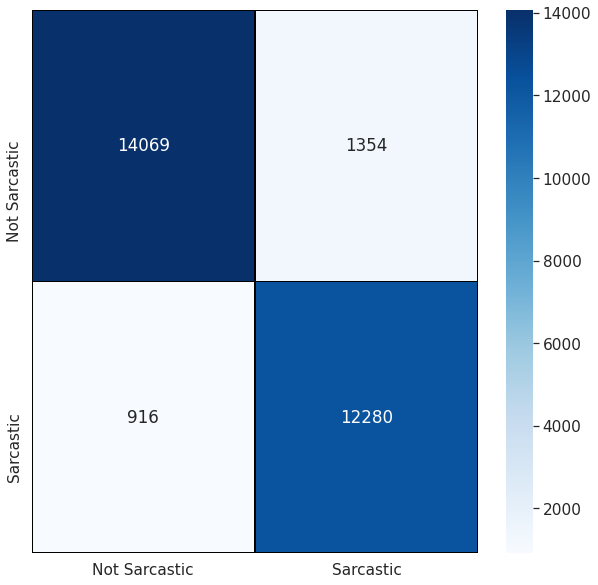

In [ ]:
import seaborn as sns
sns.set(font_scale=1.4)
col_ind_names = ['Not Sarcastic','Sarcastic']
cm = pd.DataFrame(confusion_matrix(y_pred,y_2) , index = col_ind_names , columns = col_ind_names)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , 
            annot = True, fmt='' , xticklabels = col_ind_names , yticklabels =col_ind_names)

In [ ]:
words2 = []
for i in data_second.headline.values:
    l = []
    for j in i.split():
        l.extend(i.split())
        break
    words2.append(l)   
for i in words:
  words2.append(i)

In [ ]:
len(words2)

55328

In [ ]:
MAXLEN = 50
EMBEDDING_DIM = 200

tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words2)
tokenized_train = tokenizer.texts_to_sequences(words2)
x = sequence.pad_sequences(tokenized_train, maxlen = MAXLEN)

w2v_model = gensim.models.Word2Vec(sentences = words2 , size=EMBEDDING_DIM , window = 5 , min_count = 1)

vocab_size = len(tokenizer.word_index) + 1
# #Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
#Defining Neural Network
model_4 = Sequential()
#Non-trainable embeddidng layer
model_4.add(Embedding(input_dim = vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=MAXLEN, trainable=True))
#LSTM 
model_4.add(Bidirectional(LSTM(units=128,recurrent_dropout = 0.4 , dropout = 0.4)))
model_4.add(Dense(64,activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

model_4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 50, 200)           7614400   
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 256)               336896    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 7,967,809
Trainable params: 7,967,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
is_sarcastic_dat = np.hstack((data_first.is_sarcastic,data_second.is_sarcastic))

In [ ]:
is_sarcastic_dat.shape,x.shape

((55328,), (55328, 50))

In [ ]:
# batch_size = 128 
# Sau khi đã tăng số chiều của x từ 20 lên 50
x_train, x_test, y_train, y_test = train_test_split(x, is_sarcastic_dat , test_size = 0.3 , random_state = 0) 
BATCH_SIZE = 128
EPOCHS = 5
history = model_4.fit(x_train, y_train, batch_size = BATCH_SIZE , validation_data = (x_test,y_test) , epochs = EPOCHS)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 38729 samples, validate on 16599 samples
Epoch 1/5
38729/38729 [==============================] - 201s 5ms/step - loss: 0.6923 - acc: 0.5362 - val_loss: 0.6894 - val_acc: 0.5433
Epoch 2/5
38729/38729 [==============================] - 196s 5ms/step - loss: 0.6886 - acc: 0.5481 - val_loss: 0.6902 - val_acc: 0.5408
Epoch 3/5
38729/38729 [==============================] - 198s 5ms/step - loss: 0.6616 - acc: 0.6052 - val_loss: 0.7248 - val_acc: 0.5247
Epoch 4/5
38729/38729 [==============================] - 201s 5ms/step - loss: 0.6233 - acc: 0.6432 - val_loss: 0.7900 - val_acc: 0.5126
Epoch 5/5
38729/38729 [==============================] - 197s 5ms/step - loss: 0.5679 - acc: 0.6952 - val_loss: 0.8603 - val_acc: 0.5153


In [ ]:
#Defining Neural Network
model_5 = Sequential()
#Non-trainable embeddidng layer
model_5.add(Embedding(input_dim = vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=MAXLEN, trainable=True))
#LSTM 
model_5.add(Bidirectional(LSTM(units=128,recurrent_dropout = 0.3 , dropout = 0.5 ,return_sequences = True)))
model_5.add(GlobalMaxPool1D())
model_5.add(Dense(64,activation='relu'))
model_5.add(Dense(32,activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))
model_5.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

model_5.summary()

x_train, x_test, y_train, y_test = train_test_split(x, is_sarcastic_dat , test_size = 0.2 , random_state = 0) 
BATCH_SIZE = 128
EPOCHS = 5
history = model_5.fit(x_train, y_train, batch_size = BATCH_SIZE , validation_data = (x_test,y_test) , epochs = EPOCHS)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 50, 200)           7614400   
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 50, 256)           336896    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 7,969,857
Trainable params: 7,969,857
Non-trainable params: 0
___________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44262 samples, validate on 11066 samples
Epoch 1/5
44262/44262 [==============================] - 225s 5ms/step - loss: 0.6910 - acc: 0.5398 - val_loss: 0.6891 - val_acc: 0.5451
Epoch 2/5
44262/44262 [==============================] - 221s 5ms/step - loss: 0.6807 - acc: 0.5652 - val_loss: 0.6939 - val_acc: 0.5354
Epoch 3/5
44262/44262 [==============================] - 226s 5ms/step - loss: 0.6138 - acc: 0.6539 - val_loss: 0.7786 - val_acc: 0.5246
Epoch 4/5
44262/44262 [==============================] - 221s 5ms/step - loss: 0.5347 - acc: 0.7011 - val_loss: 1.1937 - val_acc: 0.5043
Epoch 5/5
15744/44262 [=========>....................] - ETA: 2:16 - loss: 0.4615 - acc: 0.7356

KeyboardInterrupt: ignored

WORD2VEC là một trong những kĩ thuật WORDEMBEDDING nghĩa rằng nó tìm mối quan hệ về mặt ngữ nghĩa (text semantic) theo một độ đo nào đó sẽ được trình bày sau:

- Ví dụ cặp từ Queen và King sẽ có mối quan hệ gần nhau hơn cặp từ Boy và Girl hay 2 địa danh chẳng hạn : Paris-Hanoi.

Phương pháp này tối ưu hơn One-hot Encoding ở chỗ: One-hot Encoding chỉ có nước cháy nhà-cháy cpu vì chiều của vector encoding đó cực lớn khi đang xét về ngữ cảnh là 1 văn bản.

In [ ]:
# Không cho vậy thì ta đọc theo dòng !!
data_first = pd.read_json("Sarcasm_Headlines_Dataset.json",lines=True)
data_second = pd.read_json("Sarcasm_Headlines_Dataset_v2.json",lines=True)

In [ ]:
data_first.drop(columns="article_link",inplace = True)
data_second.drop(columns="article_link",inplace = True)

In [ ]:
data_first.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
data_second.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [ ]:
df = pd.concat((data_first,data_second))

In [ ]:
df['headline']=df['headline'].apply(denoise_text)

In [ ]:
words = []
for i in df.headline.values:
    l = []
    for j in i.split():
        l.extend(i.split())
        break
    words.append(l)   

In [ ]:
max_features = 10000
maxlen = 100
embedding_size = 200

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(words)
X = tokenizer.texts_to_sequences(words)
X = pad_sequences(X, maxlen = maxlen)
y = df['is_sarcastic']

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# MAXLEN = 50
# EMBEDDING_DIM = 200

# tokenizer = text.Tokenizer(num_words=35000)
# tokenizer.fit_on_texts(words2)
# tokenized_train = tokenizer.texts_to_sequences(words2)
# x = sequence.pad_sequences(tokenized_train, maxlen = MAXLEN)

w2v_model = Word2Vec(sentences = words , size=EMBEDDING_DIM , window = 5 , min_count = 1)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

38072


In [ ]:
# #Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
#Defining Neural Network
model_5 = Sequential()
#Non-trainable embeddidng layer
model_5.add(Embedding(input_dim = vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=True))
#LSTM 
model_5.add(Bidirectional(LSTM(units=128,recurrent_dropout = 0.3 , dropout = 0.5 ,return_sequences = True)))
model_5.add(GlobalMaxPool1D())
model_5.add(Dense(64,activation='relu'))
model_5.add(Dense(32,activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))
model_5.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

model_5.summary()

x_train, x_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 0) 
BATCH_SIZE = 128
EPOCHS = 5
history = model_5.fit(x_train, y_train, batch_size = BATCH_SIZE , validation_data = (x_test,y_test) , epochs = EPOCHS)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 100, 200)          7614400   
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 100, 256)          336896    
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 7,969,857
Trainable params: 7,969,857
Non-trainable params: 0
___________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44262 samples, validate on 11066 samples
Epoch 1/5
 2048/44262 [>.............................] - ETA: 6:40 - loss: 0.7080 - acc: 0.5483

KeyboardInterrupt: ignored

In [ ]:
#Defining Neural Network
model_6 = Sequential()
#Non-trainable embeddidng layer
model_6.add(Embedding(input_dim = vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=100, trainable=True))
#LSTM 
model_6.add(Bidirectional(LSTM(units=128,recurrent_dropout = 0.3 , dropout = 0.5 ,return_sequences = True)))
model_6.add(GlobalMaxPool1D())
model_6.add(Dense(64,activation='relu'))
model_6.add(Dense(32,activation='relu'))
model_6.add(Dense(1, activation='sigmoid'))
model_6.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

model_6.summary()

x_train, x_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 0) 
BATCH_SIZE = 128
EPOCHS = 5
history = model_6.fit(x_train, y_train, batch_size = BATCH_SIZE , validation_data = (x_test,y_test) , epochs = EPOCHS)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 100, 200)          7614400   
_________________________________________________________________
bidirectional_29 (Bidirectio (None, 100, 256)          336896    
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 33        
Total params: 7,969,857
Trainable params: 7,969,857
Non-trainable params: 0
___________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44262 samples, validate on 11066 samples
Epoch 1/5
44262/44262 [==============================] - 410s 9ms/step - loss: 0.4081 - acc: 0.8065 - val_loss: 0.3253 - val_acc: 0.8626
Epoch 2/5
44262/44262 [==============================] - 409s 9ms/step - loss: 0.2046 - acc: 0.9195 - val_loss: 0.2586 - val_acc: 0.9010
Epoch 3/5
44262/44262 [==============================] - 407s 9ms/step - loss: 0.1187 - acc: 0.9558 - val_loss: 0.2846 - val_acc: 0.9184
Epoch 4/5
44262/44262 [==============================] - 412s 9ms/step - loss: 0.0868 - acc: 0.9686 - val_loss: 0.2753 - val_acc: 0.9252
Epoch 5/5
44262/44262 [==============================] - 414s 9ms/step - loss: 0.0648 - acc: 0.9759 - val_loss: 0.2890 - val_acc: 0.9300


In [ ]:
from keras.models import load_model
from keras.models import model_from_json
model_6.save('/content/drive/My Drive/Sarcasm Detection/my_model6.h5')
model_6.save_weights("/content/drive/My Drive/Sarcasm Detection/model_6_weights.h5")

In [ ]:
model_json = model_6.to_json()
with open("/content/drive/My Drive/Sarcasm Detection/model_6_js.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from keras.models import model_from_json
json_file = open("/content/drive/My Drive/Sarcasm Detection/model_js.json", 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [ ]:
loaded_model.load_weights("/content/drive/My Drive/Sarcasm Detection/model_weights.h5")

In [ ]:
loaded_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 50, 200)           7614400   
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 50, 256)           336896    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total params: 7,969,857
Trainable params: 7,969,857
Non-trainable params: 0
___________________________________________

In [ ]:
np.save("/content/drive/My Drive/Sarcasm Detection/embedding_vectors_model_6",embedding_vectors)

In [ ]:
from numpy import load
# load array
embedding_vectors_2 = load("/content/drive/My Drive/Sarcasm Detection/embedding_vectors.npy")

In [ ]:
new_tittle = tokenizer.texts_to_sequences(df['headline'][0:5])
new_tittle = pad_sequences(new_tittle, maxlen = maxlen)
model_6.predict_classes(new_tittle)

array([[0],
       [0],
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
new_tittle = tokenizer.texts_to_sequences(("Area Man Crawling On Ground Like Pig To Plug Macbook Power Cord Behind Desk"
,"White House Toilet Doesn’t Know If It Can Handle Another 4 Years Of Trump"))
new_tittle = pad_sequences(new_tittle, maxlen = maxlen)

In [ ]:
model_6.predict_classes(new_tittle)

array([[1],
       [1]], dtype=int32)

In [ ]:
import pickle
# saving
with open('/content/drive/My Drive/Sarcasm Detection/tokenizer_model_6.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/My Drive/Sarcasm Detection/tokenizer.pickle', 'rb') as handle:
    tokenizer_2 = pickle.load(handle)

In [ ]:
new_tittle = pd.read_fwf('/content/drive/My Drive/Sarcasm Detection/headlines_h1.txt', sep="\n", header=None)

In [ ]:
new_tittle = tokenizer_2.texts_to_sequences(new_tittle[0])
new_tittle = pad_sequences(new_tittle, maxlen = maxlen)

In [ ]:
pred = loaded_model.predict_classes(new_tittle)

In [ ]:
new_tittle[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 8228, 5812, 1058, 2503,    9,  101,
        400, 1422,   36, 2216, 6664, 4067], dtype=int32)

In [ ]:
pred

In [ ]:
unique, counts = np.unique(pred, return_counts=True)

In [ ]:
counts

array([389, 319])

In [ ]:
counts[0]/counts.sum()

0.512

In [ ]:
head_lines = ["Entire Oklahoma State Team To Boycott Season After Mike Gundy Seen In NCAA Shirt",
"Fantasy Baseball League Commissioner Knows Handling Of Pandemic Will Define His Legacy"]

In [ ]:
new_tittle = tokenizer_2.texts_to_sequences(head_lines)
new_tittle = pad_sequences(new_tittle, maxlen = maxlen)

In [ ]:
pred = loaded_model.predict_classes(new_tittle)

In [ ]:
pred

array([[1],
       [1]], dtype=int32)

In [ ]:
head_lines = ["6 Staffers Working On Trump’s Tulsa Rally Test Positive For COVID-19",
"Fantasy Baseball League Commissioner Knows Handling Of Pandemic Will Define His Legacy"
,"3 States See Record High In Daily Coronavirus Infections After Reopening"
,"Trump Fires U.S. Attorney Who Led Probes Of The President’s Men"
,"Huh, Boyfriend’s Ex Just Made Interesting Hair Choice"]
new_tittle = tokenizer_2.texts_to_sequences(head_lines)
new_tittle = pad_sequences(new_tittle, maxlen = maxlen)
pred = loaded_model.predict_classes(new_tittle)
pred

array([[0],
       [1],
       [0],
       [0],
       [1]], dtype=int32)